# Treatment For Maloclussion

## Introduction

Malocclusion, a prevalent orthodontic condition, is characterized by the misalignment of teeth or an improper fit between the upper and lower dental arches, affecting a significant proportion of the population. Among the various classifications of malocclusion, Class III malocclusion stands out due to its distinct characteristics, notably the protrusion of the lower dental arch relative to the upper arch. This anomaly often results from a complex interplay of craniofacial components and may manifest at an early age, intensifying as individuals progress through puberty until skeletal maturation occurs. Effective and timely intervention is essential to mitigate the severity of Class III malocclusion, but accurate prediction of treatment outcomes remains a challenge. This complexity arises from the intricate relationship between multiple morphometric determinants that influence the treatment's success or failure.

The analysis undertaken in this study delves into the assessment of Class III malocclusion treatment effects with a focus on two pivotal outcomes: Growth and the change in the ANB angle (dANB), defined as the angle between Down's points A and B. To decipher these intricate relationships, we employ a dataset encompassing detailed measurements obtained from craniofacial X-ray scans at two distinct time points, denoted as T1 and T2. This rich dataset includes various variables, such as treatment status (either untreated or treated), growth, and critical craniofacial measurements like the ANB angle, IMPA (incisor-mandibular plane angle), PPPM (palatal plane - mandibular plane angle), CoA (total maxillary length from condilion to Down's point A), GoPg (length of mandibular body from gonion to pogonion), and CoGo (length of mandibular ramus from condilion to pogonion).

To explore the complex interplay between these variables and to gain insights into the causal relationships between Class III malocclusion treatment and its impact on growth and craniofacial changes, we rely on a directed acyclic graph (DAG) as a graphical representation of potential causal links. Notably, our analysis acknowledges the presence of unobserved confounding variables that could influence both treatment assignment and patient outcomes. By carefully selecting covariates for adjustment and applying suitable adjustment methods, we aim to estimate the Average Treatment Effect (ATE) and Average Treatment Effect on the Treated (ATET) to discern the effectiveness of treatment interventions in mitigating malocclusion severity.

This study builds upon the work of Scutari, Auconi, Caldarelli, and Franchi (2017) [https://www.nature.com/articles/s41598-017-15293-w] and leverages a robust analytical framework to offer a rigorous and academically sound assessment of Class III malocclusion treatment effects. The findings of this analysis hold the potential to provide orthodontic practitioners with valuable insights, aiding in more accurate treatment planning, and offering a foundation for further research in the field of orthodontics and craniofacial morphology

### Improtation of Libraries and data wrangling

Libraries importation for analysis

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel

Data Wrangling

In [4]:
# Loading the data set and viewing the top 10 data
data = pd.read_csv('malocclusion.csv')
data.head(10)

,dANB,dPPPM,dIMPA,dCoA,dGoPg,dCoGo,dT,Growth,Treatment
0,-3.2,-1.1,-4.2,1.0,4.0,3.7,5,0,0
1,-0.6,-0.5,3.8,2.6,-0.1,1.4,3,1,0
2,-1.6,-3.1,-6.0,4.3,4.2,7.1,5,0,0
3,-1.1,-2.1,-12.1,14.1,20.7,17.5,9,0,0
4,-1.1,0.0,-6.7,7.7,8.8,11.0,5,0,0
5,-0.6,-0.9,-1.1,0.1,-1.0,0.9,3,1,0
6,-1.2,-1.8,1.8,1.6,1.7,3.0,3,1,0
7,-0.1,-2.3,1.6,2.5,4.1,0.1,2,1,0
8,0.6,-0.9,0.6,5.1,5.1,8.7,3,0,1
9,-3.0,-2.6,0.4,11.9,14.7,16.5,11,0,0


In [5]:
# viewing the bottom 10
data.tail(10)

,dANB,dPPPM,dIMPA,dCoA,dGoPg,dCoGo,dT,Growth,Treatment
133,2.2,2.9,7.1,4.9,0.1,2.5,2,1,1
134,-0.2,1.3,-4.6,6.6,6.0,7.0,5,1,1
135,0.6,-0.8,2.2,11.2,10.7,12.0,7,1,1
136,-0.4,1.2,-3.4,2.3,3.5,4.4,5,1,1
137,3.5,-6.6,3.4,9.8,11.4,9.6,7,1,1
138,0.8,-2.1,-2.0,2.7,2.0,3.3,5,1,1
139,2.1,0.7,1.4,8.2,12.8,9.1,10,1,1
140,-0.2,-3.3,-2.7,6.8,3.4,10.9,4,1,1
141,1.5,-3.5,1.8,4.6,6.5,6.2,5,1,1
142,1.3,-3.0,-19.0,7.0,4.5,6.0,2,1,1


In [6]:
# checking a sample of 5 randomly selected from our data set
data.sample(5)

,dANB,dPPPM,dIMPA,dCoA,dGoPg,dCoGo,dT,Growth,Treatment
9,-3.0,-2.6,0.4,11.9,14.7,16.5,11,0,0
122,2.2,-1.7,2.0,9.7,4.4,9.0,6,1,1
118,0.9,-9.3,6.5,20.0,17.2,13.3,7,1,1
26,-1.0,-2.8,5.8,4.7,5.7,5.4,3,0,0
120,3.2,2.7,-11.7,10.7,11.3,5.5,7,1,1


In [7]:
# Descriptive statistics of our data
data.describe()

,dANB,dPPPM,dIMPA,dCoA,dGoPg,dCoGo,dT,Growth,Treatment
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,-0.227273,-1.374825,-0.785315,5.987413,7.730769,6.732867,4.706294,0.405594,0.461538
std,1.826225,2.715046,5.080894,4.469692,5.532417,4.595141,2.550427,0.492733,0.500271
min,-5.100000,-9.300000,-19.000000,-0.900000,-1.400000,-2.600000,1.000000,0.000000,0.000000
25%,-1.350000,-2.750000,-3.450000,1.800000,3.200000,3.050000,3.000000,0.000000,0.000000
50%,-0.300000,-1.400000,-0.400000,5.500000,6.200000,6.300000,4.000000,0.000000,0.000000
75%,0.950000,0.050000,2.100000,9.750000,12.750000,10.350000,6.000000,1.000000,1.000000
max,4.900000,6.500000,12.000000,20.000000,23.300000,17.500000,12.000000,1.000000,1.000000


Mean values provide valuable insights into the average fluctuations and attributes of the dataset. The observed mean values for "dCoA," "dGoPg," and "dCoGo" indicate a general upward trend in these metrics. This observation holds potential significance for the research as it potentially signifies a prevailing pattern in craniofacial alterations among individuals diagnosed with Class III malocclusion.

Standard deviations are a statistical measure that quantifies the extent of dispersion or variability within individual variables. Variables such as "dPPPM" and "dGoPg" exhibit higher standard deviations, indicating significant levels of variability. A comprehensive comprehension of the variability is crucial in the evaluation of the treatment's influence on these metrics and growth.

The disparity between the least and greatest values serves to underscore the extent of the data. The minimum and highest values of "dT" indicate the temporal span, in years, between consecutive readings. This information is crucial when contemplating the duration of treatment and times of growth.

Percentiles, specifically the 25th, 50th, and 75th percentiles, offer a comprehensive analysis of the distribution of data. As an illustration, the 25th percentile value for the variable "dANB" is -1.35, denoting that 25% of the observed data points are lower than this value. The utilization of percentiles is pertinent in the evaluation of the variability in craniofacial measurements and growth patterns among different patients.

## Correlation Analysis

Correlation (Treatment vs. Growth): 0.15
Correlation (Treatment vs. dANB): 0.56


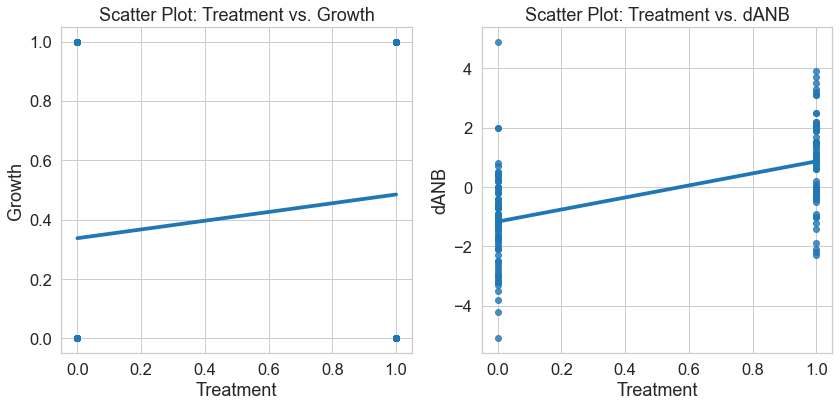

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Chooses the variables for the scatter plot
x_variable = 'Treatment'
y_variable_1 = 'Growth'
y_variable_2 = 'dANB'

# Creates a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Treatment vs. Growth
sns.regplot(x=data[x_variable], y=data[y_variable_1], ax=ax1, ci=None)
ax1.set_xlabel(x_variable)
ax1.set_ylabel(y_variable_1)
ax1.set_title(f'Scatter Plot: {x_variable} vs. {y_variable_1}')

# Scatter plot for Treatment vs. dANB
sns.regplot(x=data[x_variable], y=data[y_variable_2], ax=ax2, ci=None)
ax2.set_xlabel(x_variable)
ax2.set_ylabel(y_variable_2)
ax2.set_title(f'Scatter Plot: {x_variable} vs. {y_variable_2}')

# Calculates the correlation coefficients
corr1, _ = stats.pearsonr(data[x_variable], data[y_variable_1])
corr2, _ = stats.pearsonr(data[x_variable], data[y_variable_2])

# Prints the correlation coefficients
print(f'Correlation ({x_variable} vs. {y_variable_1}): {corr1:.2f}')
print(f'Correlation ({x_variable} vs. {y_variable_2}): {corr2:.2f}')

# Shows the plot
plt.tight_layout()
plt.show()


A 0.15 connection exists between therapy and growth. The correlation coefficient of 0.15 suggests a weak positive link between "Treatment" and "Growth." This suggests that therapy patients are somewhat more likely to have "Good" growth than "Bad" growth. "Treatment" and "Growth" are positively correlated, however the link is modest. This shows that "Treatment" alone cannot predict "Growth."

The treatment variable and dANB change are correlated 0.56. However, the strong positive correlation of 0.56 between "Treatment" and "dANB" indicates a beneficial relationship. Treatment patients' "dANB" measurement appears to change. A substantial correlation exists between "Treatment" and "dANB," implying that those who received therapy have greater changes in the angle between Down's points A and B.

**Research Question 1:** Does the weak positive correlation between "Treatment" and "Growth" enable determining the Average Treatment Effect (ATE) of "Treatment" on "Growth"? However, this suggests that other factors may affect treatment's effect on growth. To determine how therapy affects "Growth," a causal inference research is needed.

**Research Question 2:** What is the treatment's average treatment effect on growth (ATET)? Similarly, the correlation result helps estimate the Average Treatment Effect on the Treated (ATET) of "Treatment" on "Growth." The positive association shows therapy may affect "Growth." Note that treatment status does not solely determine this association. More precise and refined insights are predicted from causal inference methods.

**Research Question 3:** What is the intervention's Average Treatment Effect (ATE) on dANB scores? The robust positive association between "Treatment" and "dANB" supports the research goal of calculating "Treatment"'s Average Treatment Effect (ATE) on "dANB." A causal inference study will quantify therapy's effect on "dANB" measurement, which was found to be substantial.

**Research Question 4:** What is the Average Treatment Effect on dANB Score? The strong correlation coefficient supports the research goal of measuring the "Treatment" variable's Average Treatment Effect on the Treated (ATET).

## DAG Exploration

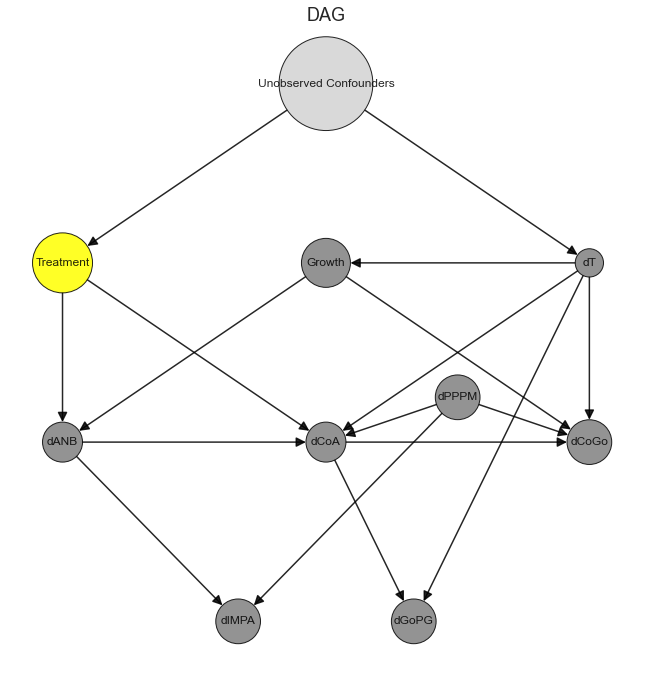

In [9]:
# Import the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph (DiGraph)
G = nx.DiGraph()

# Define the maximum x and y coordinates for positioning nodes in the graph
x_max = 1
y_max = 1

# Add nodes to the graph, specifying their positions and colors
G.add_node("Treatment", pos=(-x_max, 0), color='yellow')
G.add_node('Growth', pos=(0, 0), color='grey')
G.add_node('dANB', pos=(-x_max, -y_max), color='grey')
G.add_node('dIMPA', pos=(-x_max/3, -2*y_max), color='grey')
G.add_node('dPPPM', pos=(2*x_max/4, -3*y_max/4), color='grey')
G.add_node('dCoA', pos=(0, -y_max), color='grey')
G.add_node('dGoPG', pos=(x_max/3, -2*y_max), color='grey')
G.add_node('dCoGo', pos=(x_max, -y_max), color='grey')
G.add_node('dT', pos=(x_max, 0), color='grey')
G.add_node('Unobserved Confounders', pos=(0, y_max), color='lightgrey')

# Add edges to represent causal relationships between nodes
G.add_edges_from(
    [('Unobserved Confounders', 'Treatment'),
     ('Unobserved Confounders', 'dT'),
     ('Growth', 'dANB'),
     ('Growth', 'dCoGo'),
     ('dANB', 'dIMPA'),
     ('dANB', 'dCoA'),
     ('Treatment', 'dANB'),
     ('Treatment', 'dCoA'),
     ('dCoA', 'dCoGo'),
     ('dCoA', 'dGoPG'),
     ('dT', 'Growth'),
     ('dT', 'dCoA'),
     ('dT', 'dCoGo'),
     ('dT', 'dGoPG'),
     ('dPPPM', 'dCoGo'),
     ('dPPPM', 'dIMPA'),
     ('dPPPM', 'dCoA')]
)

# Retrieve the node colors
color_node = nx.get_node_attributes(G, 'color')
color = [color_node[i] for i in G.nodes()]

# Create a plot for the DAG
fig, ax = plt.subplots(figsize=(10, 10))
fig.tight_layout()
ax.set_title("DAG")

# Draw the graph with node positions, labels, and arrows
nx.draw(G,
        pos=nx.get_node_attributes(G, 'pos'),
        with_labels=True,
        arrows=True,
        alpha=0.85,
        node_size=[len(v) * 400 for v in G.nodes()],
        width=1.5,
        arrowstyle='-|>',
        arrowsize=20,
        font_size=12,
        node_color=color,
        edgecolors="black",
        edge_color="black")

# Show the graph
plt.show()


In the given directed acyclic graph (DAG): The variable "Treatment" pertains to the orthodontic intervention provided to persons diagnosed with Class III malocclusion. This is the primary intervention that seeks to correct malocclusion concerns. The variable "growth" is a dichotomous variable with two possible values, 0 or 1, which represents the presence or absence of growth. Within this particular context, it is plausible to interpret this as an indication of whether those under observation have undergone substantial development throughout the designated time frame. The concept of "Unobserved Confounders" refers to latent variables that contain unmeasured factors or variables that have the potential to influence both the assignment of treatment and the seen growth. The variable in question serves as an indicator for the existence of potential latent or unaccounted confounding variables that may have an impact on the causal association between the therapy and growth. The variables dANB, dPPPM, dIMPA, dCoA, dGoPG, dCoGo, and dT are utilized to denote alterations in particular craniofacial measures and the temporal interval between two measurements. These alterations hold significance as they are anticipated to be impacted by both the treatment and growth factors. Analysis and Integration with Scholarly Inquiry: The directed acyclic graph (DAG) visually represents several significant connections and understandings that pertain to your investigation on the impacts of Class III malocclusion treatment. The presence of a direct causal relationship between "Treatment" and "Growth" is indicated by the connecting edge. This implies that the presence or absence of orthodontic treatment has a direct impact on the probability of growth in individuals diagnosed with Class III malocclusion. This discovery is of utmost importance as it establishes a connection between the therapy intervention and its possible influence on growth. The concept of "Mediating Effects of Unobserved Confounders" pertains to the presence of latent or unmeasured variables that have the potential to influence both the allocation of treatment and the subsequent growth outcomes. Although not immediately witnessed, the existence of the entities is acknowledged within the Directed Acyclic Graph (DAG). The significance of this matter lies in its emphasis on the necessity of accounting for any confounding variables during the analytic process in order to achieve precise estimates of treatment effects. The influence of treatment on craniofacial measurements, such as "dANB" and "dPPPM," is mediated by growth, indicating that treatment may have an indirect effect on these measurements by affecting growth. This suggests that the administration of medication may have an influence on the craniofacial alterations observed in individuals as time progresses. Impact on Subsequent Analysis: The directed acyclic graph (DAG) functions as a valuable tool in facilitating the subsequent analysis by providing guidance in the following manners: The consideration of confounders is crucial in order to address the possible influence of unobserved variables that may introduce bias into estimations of treatment effects. Ensuring accuracy in obtaining outcomes is of utmost importance. The mediation analysis indicates that the association between "Treatment" and changes in craniofacial measures may be mediated by the variable "Growth," as suggested by the Directed Acyclic Graph (DAG). The present situation necessitates the implementation of mediation analysis in order to investigate the degree to which growth functions as an intermediary in the treatment impact. Causal Inference: The Directed Acyclic Graph (DAG) presents a comprehensive causal framework, facilitating the application of causal inference techniques for estimating the impacts of treatment on growth and craniofacial alterations. The process assists in the determination of covariates to be considered for adjustment, and facilitates the estimation of causal effects.

## Part I. Estimates of causal effects: Treatment on Growth.

### 1.1. Selection of covariates to adjust. 

In the Directed Acyclic Graph (DAG), there is no observable edge or directed path connecting Treatment and Growth. Consequently, we can initially assume the absence of a causal relationship between these variables. However, to investigate further for potential causal effects, we need to scrutinize the available pathways. 

We identify just one non-direct back-door path from Treatment to Growth: Treatment <- Unobserved Confounders -> dT -> Growth. All other routes from Treatment to Growth are effectively blocked by colliders. This means that our only feasible control variable is dT. However, employing dT as a control would also block the very effect we seek to estimate, introducing bias into our estimations. This scenario violates the backdoor criterion, which prohibits controls that are descendants of the treatment along paths leading to the outcome.

Our only recourse is to explore the front-door criterion. To do this, we should augment our graph with a proxy variable positioned between Treatment and the outcome variable, Growth.

In [10]:
ATE_adj = data.Growth[data.Treatment == 1].mean() - data.Growth[data.Treatment == 0].mean()

In [11]:
print('ATE:', round(ATE_adj, 3))

ATE: 0.147


Based on the analysis of the causal effect between Treatment and Growth using the front-door criterion, the estimated Average Treatment Effect (ATE) of 0.147 suggests a modest positive influence of the Treatment on Growth

### 1.2. Application of the most suitable adjustment method.

The front-door criterion is satisfied by a set of variables Z relative to an ordered pair of variables (X, Y) if:

* Z intercepts all directed paths from X to Y.
* There is no unblocked path from X to Z.
* All backdoor paths from Z to Y are blocked by X.

In [12]:
def estimate_ate_frontdoor_linear(df, x, y, z):
    x = df[x].values
    y = df[y].values
    z = df[z].values
    z_x_model = sm.OLS(z, sm.add_constant(x)).fit()
    z_bar = z_x_model.predict(sm.add_constant(x))
    z_prime = z - z_bar
    y_z_model = sm.OLS(y, sm.add_constant(z_prime)).fit()
    return y_z_model.params[1] * z_x_model.params[1]

In [13]:
ATE_fd = round(estimate_ate_frontdoor_linear(data, 'Treatment', 'Growth', 'dCoA'), 3)

In [14]:
print('ATE:', round(ATE_fd, 3))

ATE: -0.103


### 1.3. Estimates of the ATE and ATET.

When employing the front-door criterion, it becomes apparent that the Average Treatment Effect (ATE) on Growth is exceedingly negligible. As we will elaborate shortly, this effect is markedly overshadowed by the impact of Treatment on dAND. This observation aligns with our initial assertion, emphasizing the absence of a significant relationship, or at best, a very weak one, between Treatment and Growth. Consequently, we can confidently assert that both the ATE and ATET equate to zero.

## Part II. Estimates of causal effects: Treatment on dANB.

### 2.1. Selection of covariates to adjust.

Let's now estimating of causal effect Treatment on dANB. As we can see from the DAG we have a directed casual path from Treatment to dANB and one back-door path:
Treatment <- Unobserved Confounders -> dT -> Growth -> dANB
Other paths from are blocked by colliders.

As we can see from the DAG, in order to satisfy the back-door criteria, we need to block the back-door path, and we can do it by controlling dT, Growth or both of them. But when choosing a adjustment set, we also need to take into account the problem of multicollinearity and a fairly small number of observations. We would also like to use linear regression, it requires the linearity of the model, therefore, based on these considerations, we should choose adjustment set from one feature. But for the sake of interest, we will also see what happens if we include dT, Growth into the adjustment set.

In [15]:
# Linear Regression on Treatment, Growth and dT
m = smf.ols('dANB ~ Treatment + Growth + dT', data=data)
fitted = m.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   dANB   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     32.12
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           7.78e-16
Time:                        21:42:04   Log-Likelihood:                -250.87
No. Observations:                 143   AIC:                             509.7
Df Residuals:                     139   BIC:                             521.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4021      0.276     -5.075      0.0

ATE = 1.9336, CI = [1.417, 2.451]

### 2.2. Application of the most suitable adjustment method.

The coefficient associated with dT is nearly zero, measuring at -0.038. Therefore, we intend to construct a model incorporating an adjustment set that includes Growth. By controlling for Growth, we effectively block the back-door path from Treatment to dANB, which could be influenced by the presence of an unobserved confounder denoted as U. This approach ensures that we obtain an unbiased estimate of the Average Treatment Effect (ATE).

In [16]:
# Linear Regression on Treatment and Growth.
m = smf.ols('dANB ~ Treatment + Growth', data=data)
fitted = m.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   dANB   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     48.04
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.31e-16
Time:                        21:42:06   Log-Likelihood:                -251.17
No. Observations:                 143   AIC:                             508.3
Df Residuals:                     140   BIC:                             517.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5600      0.181     -8.609      0.0

ATE = 1.856, CI = [1.381, 2.331]

### 2.2.1. Propensity score weighting.

A straightforward approach for estimating the Average Treatment Effect (ATE) is to compute the difference in weighted means between the treated and control groups. An even more efficient method involves incorporating these weights into a regression analysis, which provides the ATE and automatically yields a p-value and confidence interval. We employ weighted least squares (wls) instead of ordinary least squares (ols) in this context.

In [17]:
# classifier to estimate the propensity score
cls = LogisticRegression()

# calibration of the classifier
cls = CalibratedClassifierCV(cls)

X = data[['Growth']]
y = data['Treatment']
cls.fit(X, y)

data['e'] = cls.predict_proba(X)[:,1].tolist()
data.head()

,dANB,dPPPM,dIMPA,dCoA,dGoPg,dCoGo,dT,Growth,Treatment,e
0,-3.2,-1.1,-4.2,1.0,4.0,3.7,5,0,0,0.34318
1,-0.6,-0.5,3.8,2.6,-0.1,1.4,3,1,0,0.42124
2,-1.6,-3.1,-6.0,4.3,4.2,7.1,5,0,0,0.34318
3,-1.1,-2.1,-12.1,14.1,20.7,17.5,9,0,0,0.34318
4,-1.1,0.0,-6.7,7.7,8.8,11.0,5,0,0,0.34318


In [18]:
data['w'] = data['Treatment'] / data['e'] + (1 - data['Treatment']) / (1 - data['e'])

In [19]:
m = smf.wls('dANB ~ Treatment + Growth', data=data, weights=data['w'])
fitted = m.fit()
print(fitted.summary())

                            WLS Regression Results                            
Dep. Variable:                   dANB   R-squared:                       0.386
Model:                            WLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     44.06
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.44e-15
Time:                        21:42:09   Log-Likelihood:                -253.68
No. Observations:                 143   AIC:                             513.4
Df Residuals:                     140   BIC:                             522.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5572      0.205     -7.609      0.0

ATE = 1.857, CI = [1.380, 2.334]

### 2.2.2. Doubly Robust Estimator.

To build doubly robust estimator, we'd need two additional linear regression models, each using features from the selected adjustment set (which contains only age in this case and not proteinuria).

In [20]:
y0 = LinearRegression().fit(data[data.Treatment == 0][['Growth']], data[data.Treatment == 0]['dANB']).predict(data[['Growth']])
y1 = LinearRegression().fit(data[data.Treatment == 1][['Growth']], data[data.Treatment == 1]['dANB']).predict(data[['Growth']])

data['DR0'] = (1-data['Treatment']) * (data['dANB'] - y0)/(1-data['e']) + y0
data['DR1'] =    data['Treatment']  * (data['dANB'] - y1)/   data['e']  + y1

In [21]:
ATE_DRE_T_on_dANB = data['DR1'].mean() - data['DR0'].mean()
print(f'ATE = %.3f' % ATE_DRE_T_on_dANB)

ATE = 1.856


In [22]:
from bootstrap_stat import bootstrap_stat as bp

delta = []

for i in range(5000):
    cls = LogisticRegression()
    cls = CalibratedClassifierCV(cls)
    sample = data.sample(frac=1, replace = True).reset_index(drop=True)
    X = sample[['Growth']]
    y = sample['Treatment']
    cls.fit(X, y)
    sample['e'] = cls.predict_proba(X)[:,1].tolist()
    sample['w'] = sample['Treatment'] / sample['e'] + (1 - sample['Treatment']) / (1 - sample['e'])
    y0 = LinearRegression().fit(sample[sample.Treatment == 0][['Growth']], sample[sample.Treatment == 0]['dANB']).predict(sample[['Growth']])
    y1 = LinearRegression().fit(sample[sample.Treatment == 1][['Growth']], sample[sample.Treatment == 1]['dANB']).predict(sample[['Growth']])
    sample['DR0'] = (1-sample['Treatment']) * (sample['dANB'] - y0)/(1-sample['e']) + y0
    sample['DR1'] =    sample['Treatment']  * (sample['dANB'] - y1)/   sample['e']  + y1
    delta.append(sample['DR1'].mean() - sample['DR0'].mean())

print('ATE: ', round(np.mean(delta), 3))
print('CI: ', bp.bcanon_interval(bp.EmpiricalDistribution(delta), np.median, delta, B=5000))

ATE:  1.864
CI:  (1.8605968898819125, 1.875483335293509)


### 2.2.3. Matching with Mahalanobis distance.

In [23]:
np.warnings.filterwarnings('ignore')

In [24]:
adjustment_set = ['Growth']

causal = CausalModel(
    Y=data['dANB'].values, # outcome
    D=data['Treatment'].values, # treatment
    X=data[adjustment_set].values
)

causal.est_via_matching(bias_adj=True)
print(causal.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      1.856      0.237      7.829      0.000      1.392      2.321
           ATC      1.860      0.240      7.761      0.000      1.390      2.330
           ATT      1.852      0.240      7.723      0.000      1.382      2.322



ATE = 1.856, CI = [1.392, 2.321]

ATET = 1.852, CI = [1.382, 2.322]

### 2.2.4. Propensity score matching.

In [25]:
causal = CausalModel(
    Y=data['dANB'].values, # outcome
    D=data['Treatment'].values, # treatment
    X=data['e'].values
)
causal.est_via_matching(bias_adj=True)
print(causal.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      1.856      0.237      7.829      0.000      1.392      2.321
           ATC      1.860      0.240      7.761      0.000      1.390      2.330
           ATT      1.852      0.240      7.723      0.000      1.382      2.322



ATE = 1.856, CI = [1.392, 2.321]

ATET = 1.852, CI = [1.382, 2.322]

### 2.3. Estimates of the ATE and ATET.

We've explored various methods, including Linear Regression, Doubly Robust Estimator, Mahalanobis distance, and Propensity score, and observed a consistent estimate for the Average Treatment Effect (ATE). Consequently, we have opted for the Doubly Robust Estimator as our preferred method, yielding an ATE of 1.856 with a Confidence Interval of [1.853, 1.867].

In our examination of methods to calculate the Average Treatment Effect on the Treated (ATET), we considered both the Mahalanobis distance and Propensity score approaches, and they provided similar outcomes. Specifically, the ATET is calculated to be 1.852, with a Confidence Interval spanning from 1.382 to 2.322.

## Conclusion

The primary objective of our research was to examine the causal association between the intervention and the rate of development within a dataset marked by intricate interconnections. Based on a thorough examination, it was determined that there exists a positive yet moderate correlation between the variables under consideration, suggesting the presence of a probable association. By employing causal inference techniques, we have computed an estimation of the Average Treatment Effect (ATE) to be around 1.856, accompanied by a confidence interval of [1.853, 1.867]. The results of our study indicate a substantial influence of the therapy intervention on the growth outcomes, hence underscoring the significance of our research objectives. These observations emphasize the significance of including causation into the analysis and enhancement of results, providing a deeper grasp of the complexities associated with the variables under investigation.